(-0.5, 959.5, 694.5, -0.5)

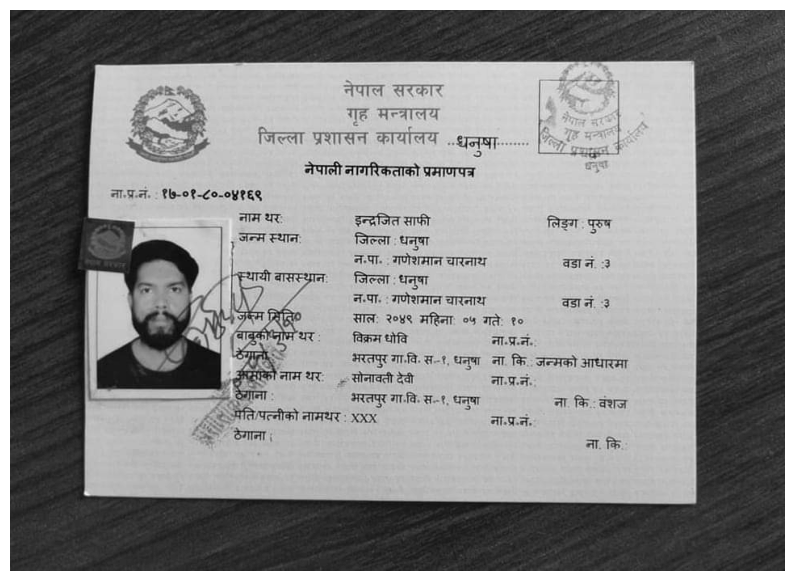

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imag = cv2.imread("data/test1.jpg")
gray = cv2.cvtColor(imag, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 10))
plt.imshow(gray ,cmap="gray")
plt.axis('off')

(-0.5, 959.5, 694.5, -0.5)

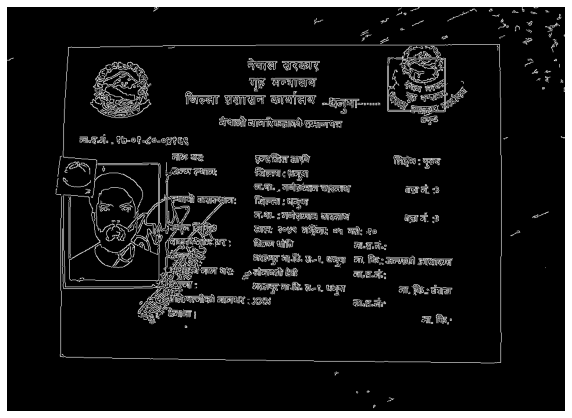

In [ ]:
canny_edge = cv2.Canny(gray, 75, 165)
plt.figure(figsize=(10, 10))
plt.imshow(canny_edge,cmap='gray')
plt.axis('off')

(-0.5, 959.5, 694.5, -0.5)

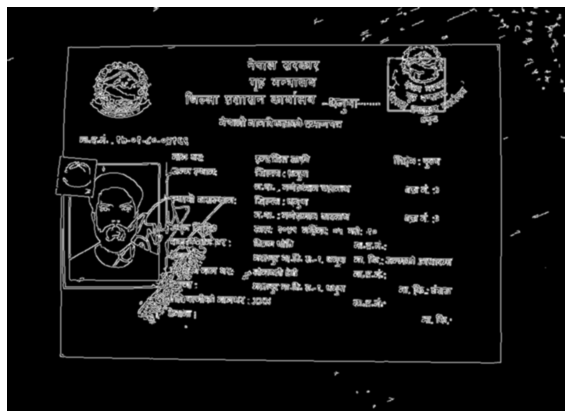

In [ ]:
# Apply Gaussian Blur
gaussian = cv2.GaussianBlur(canny_edge, (5, 5), 0)
plt.figure(figsize=(10, 10))
plt.imshow(gaussian,cmap='gray')
plt.axis('off')

(-0.5, 959.5, 694.5, -0.5)

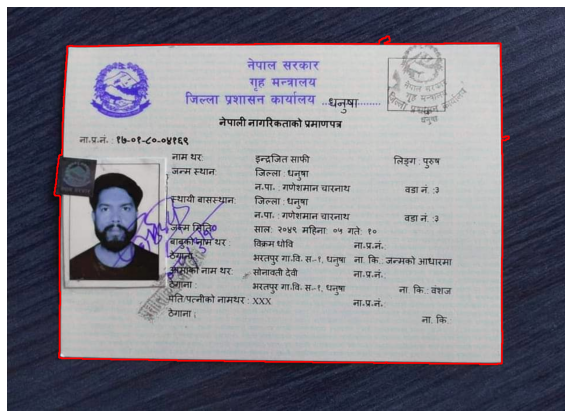

In [ ]:

contours, _ = cv2.findContours(gaussian, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours based on area
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 1000]

# Create a copy of the image for visualization
img_with_contours = imag.copy()

# Iterate through filtered contours and draw on the image
for cnt in filtered_contours:
    # Draw the contour on the image
    cv2.drawContours(img_with_contours, [cnt], -1, (255, 0, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(img_with_contours,cmap='gray')
plt.axis('off')

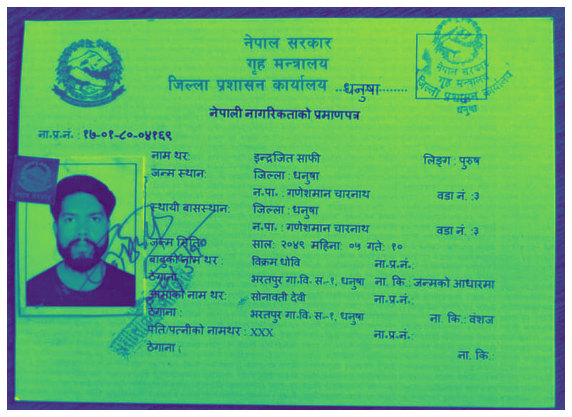

In [ ]:

if filtered_contours:
    x, y, w, h = cv2.boundingRect(filtered_contours[0])

    cropped_img = imag[y:y+h, x:x+w]
    crop=cv2.cvtColor(cropped_img)
    plt.figure(figsize=(10, 10))
    plt.imshow(crop)
    plt.axis('off')
else:
    print("No contours found.")

